# Mental Health in the Tech Industry Analysis EDA 📊

Welcome to the comprehensive analysis of mental health trends within the tech industry. 

This exploratory data analysis (EDA) delves into the intricacies of mental health perceptions and occurrences in the technology sector, utilizing survey data collected by Open Source Mental Illness (OSMI) across multiple years - 2014, 2016, 2017, 2018, and 2019. 

Through this analysis, I aim to uncover valuable insights into attitudes towards mental health, the prevalence of mental health disorders, and their implications in the tech workplace.

The dataset can be accessed [here](https://www.kaggle.com/datasets/anth7310/mental-health-in-the-tech-industry/data).

## 📌Part 1. Data Loading & Overview

In [1]:
#%load_ext nb_black
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
import seaborn as sns
import sqlite3 as sql

print("Setup Complete")

Setup Complete


In [2]:
con = sql.connect("mental_health3.sqlite")

In [3]:
query = """SELECT name 
            FROM sqlite_master 
            WHERE type = 'table';
            """
cursor = con.cursor()
cursor.execute(query)
tables = cursor.fetchall()

print("Tables in the database:")
for table in tables:
    print(table[0])

Tables in the database:
Answer
Question
Survey


#### Data Overview

Answer Table

In [4]:
query = """
        SELECT * FROM Answer;
        """
pd.read_sql(query, con)

,AnswerText,SurveyID,UserID,QuestionID
0,37,2014,1,1
1,44,2014,2,1
2,32,2014,3,1
3,31,2014,4,1
4,31,2014,5,1
...,...,...,...,...
236893,Other,2016,2689,117
236894,Support,2016,2690,117
236895,Back-end Developer,2016,2691,117
236896,DevOps/SysAdmin,2016,2692,117


Questions Table

In [5]:
query = """
SELECT * FROM Question;
"""
pd.set_option("display.max_colwidth", None)
pd.read_sql(query, con)

,questiontext,questionid
0,What is your age?,1
1,What is your gender?,2
2,What country do you live in?,3
3,"If you live in the United States, which state or territory do you live in?",4
4,Are you self-employed?,5
...,...,...
100,Do you think that team members/co-workers would view you more negatively if they knew you suffered from a mental health issue?,114
101,"If yes, what condition(s) have you been diagnosed with?",115
102,"If maybe, what condition(s) do you believe you have?",116
103,Which of the following best describes your work position?,117


Survey Table

In [6]:
query = """
SELECT * FROM Survey;
"""
pd.read_sql(query, con)

,SurveyID,Description
0,2014,mental health survey for 2014
1,2016,mental health survey for 2016
2,2017,mental health survey for 2017
3,2018,mental health survey for 2018
4,2019,mental health survey for 2019


## 📌Part 2. Data Cleaning

#### 2.1 Answer Table

Cleaning age data

In [7]:
update_query = """
    UPDATE Answer 
    SET AnswerText = NULL
    WHERE QuestionID = 1
    AND (CAST(AnswerText AS INTEGER) < 10 OR CAST(AnswerText AS INTEGER) > 95);
"""

con.execute(update_query)
con.commit()

In [8]:
query = """
        SELECT * FROM Answer
        WHERE AnswerText IS NULL;
        """
pd.read_sql(query, con)

,AnswerText,SurveyID,UserID,QuestionID
0,None,2014,144,1
1,None,2014,365,1
2,None,2014,391,1
3,None,2014,716,1
4,None,2014,735,1
5,None,2014,990,1
6,None,2014,1128,1
7,None,2016,1633,1
8,None,2016,1825,1
9,None,2016,1917,1


In [9]:
query = """
        DELETE FROM Answer
        WHERE AnswerText IS NULL;
        """
con.execute(query)

#### 2.2 Question Table

In [10]:
query = """
        SELECT * FROM Question
        WHERE questiontext IS NULL;
        """
pd.read_sql(query, con)

,questiontext,questionid


In [11]:
query = """
        SELECT COUNT(questiontext) AS counter
        FROM Question
        GROUP BY questiontext
        HAVING counter > 2;
        """
pd.read_sql(query, con)

,counter


#### Results:

During the data cleaning phase, I handled age responses by setting age limits, eliminated null values from both answers and questions, and examined question duplicates, finding none.

## 📌Part 3. Exploratory Data Analysis  📊

Text(0.5, 0, 'Survey Year')

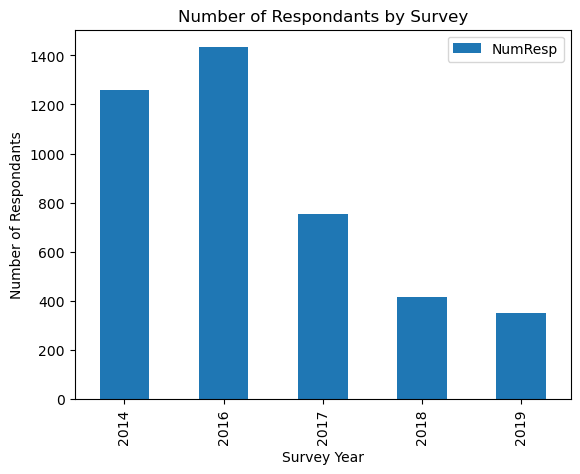

In [12]:
query = """SELECT SurveyID,
            COUNT(DISTINCT(UserID)) AS NumResp
            FROM  Answer
            GROUP BY SurveyID;"""

NumRespPerSurvey = pd.read_sql(query, con).astype({"NumResp": int})

NumRespPerSurvey.plot.bar(x="SurveyID", y="NumResp")
plt.title("Number of Respondants by Survey")
plt.ylabel("Number of Respondants")
plt.xlabel("Survey Year")

#### Result:

The highest number of respondents took part in the 2016 survey, followed by the 2014 survey, whereas participation declined by more than half from 2016 in the surveys from 2017 to 2019.

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '2014'),
  Text(1, 0, '2016'),
  Text(2, 0, '2017'),
  Text(3, 0, '2018'),
  Text(4, 0, '2019')])

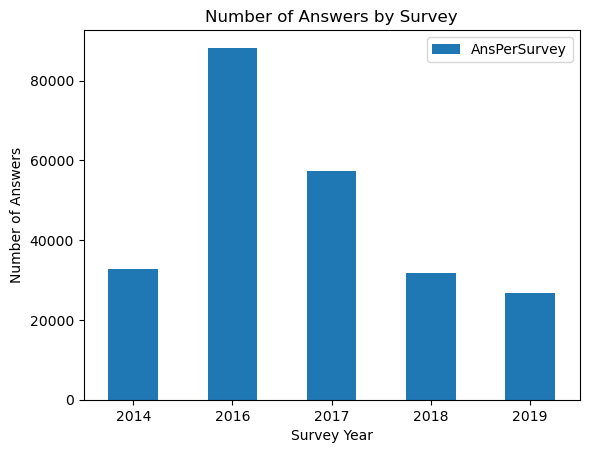

In [13]:
query = """
        SELECT SurveyID, COUNT(1) AS AnsPerSurvey
        FROM Answer
        GROUP BY SurveyID;
        """
AnsPerSurvey = pd.read_sql(query, con).astype({"AnsPerSurvey": int})

AnsPerSurvey.plot.bar(x="SurveyID", y="AnsPerSurvey")
plt.title("Number of Answers by Survey")
plt.ylabel("Number of Answers")
plt.xlabel("Survey Year")
plt.xticks(rotation=0)

#### Result:

Analogically to the number of respondents, in terms of the number of questions answered, the peak was observed in the 2016 survey, with a decline in subsequent years. However, it's noteworthy that comparatively few questions were answered in the 2014 survey despite the high participation rate.

#### Geographical analysis

In [14]:
question_query = """
SELECT questiontext
FROM Question
WHERE questionid = 3;
"""
pd.read_sql(question_query, con)

,questiontext
0,What country do you live in?


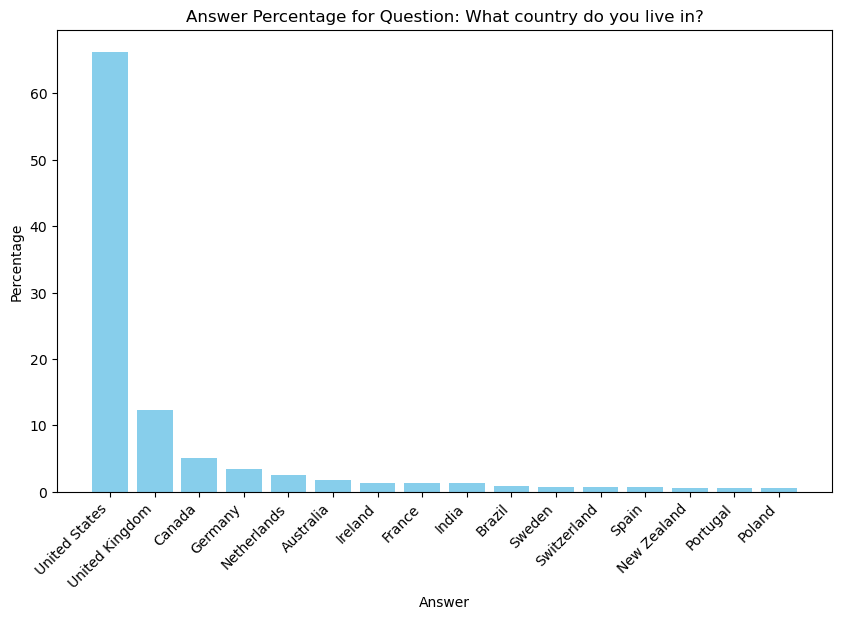

In [15]:
question_query = """
SELECT questiontext
FROM Question
WHERE questionid = 3;
"""

answer_query = """
SELECT AnswerText, COUNT(*) AS count
FROM Answer
WHERE questionid = 3
GROUP BY AnswerText
HAVING count > 20
ORDER BY count DESC;
"""

update_query = """
UPDATE Answer
SET AnswerText = 'United States'
WHERE AnswerText = 'United States of America' AND questionid = 3;
"""

con.execute(update_query)
con.commit()

question_text = pd.read_sql(question_query, con).iloc[0, 0]

answer_counts_df = pd.read_sql(answer_query, con)

total_responses = answer_counts_df["count"].sum()

answer_counts_df["percentage"] = (answer_counts_df["count"] / total_responses) * 100

plt.figure(figsize=(10, 6))
plt.bar(answer_counts_df["AnswerText"], answer_counts_df["percentage"], color="skyblue")
plt.title("Answer Percentage for Question: " + question_text)
plt.xlabel("Answer")
plt.ylabel("Percentage")
plt.xticks(rotation=45, ha="right");

#### Result:

The analysis indicates that the majority of respondents are located in the United States, with notable representation from the United Kingdom, Canada, and Germany as well. However, while the United Kingdom, Canada, and Germany are among the top countries represented, their numbers are considerably lower compared to the United States. Additionally, it's noteworthy that half of the top 20 countries in the survey dataset are from Europe, indicating significant engagement from the European tech community.

Text(0.5, 1.0, 'Do you currently have a mental health disorder?')

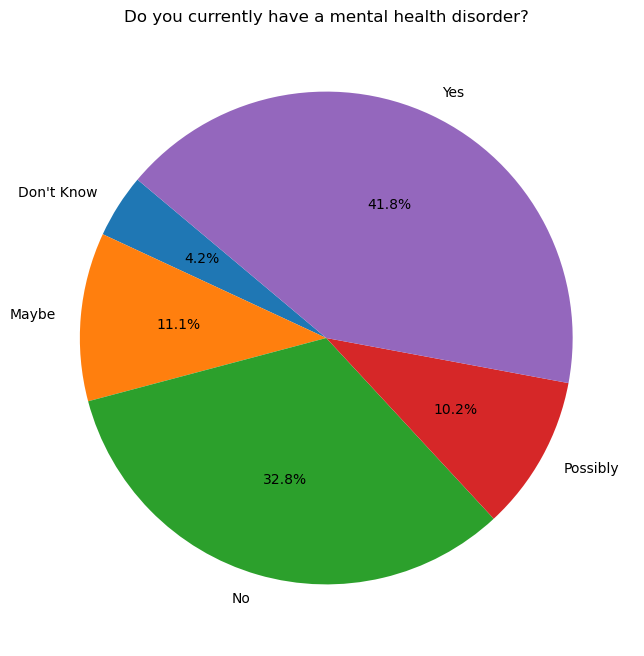

In [16]:
question_query = """
SELECT questiontext
FROM Question
WHERE questionid = 33;
"""

answer_query = """
SELECT AnswerText, COUNT(*) AS count
FROM Answer
WHERE questionid = 33
GROUP BY AnswerText;
"""

question_text = pd.read_sql(question_query, con)["questiontext"][0]

answers_data = pd.read_sql(answer_query, con)

plt.figure(figsize=(8, 8))
plt.pie(
    answers_data["count"],
    labels=answers_data["AnswerText"],
    autopct="%1.1f%%",
    startangle=140,
)
plt.title(question_text)

#### Result:

Approximately 42% of respondents across all survey years acknowledged having mental health disorders, with around a quarter expressing uncertainty ('maybe') and approximately 32.8% indicating that they do not have such disorders.

A scoring system has been implemented for calculations and establishing relationships with other variables. This system assigns a numeric value of 3 to denote the absence of a mental disease, with higher scores indicating better conditions. Conversely, a score of 1 is assigned to signify the presence of a mental health issue. In this system, 'no' corresponds to a score of 3, 'maybe' to 2, and 'yes' to 1.

In [17]:
update_query = """
UPDATE Answer
SET AnswerText = 
    CASE
        WHEN AnswerText = 'No' THEN 3
        WHEN AnswerText IN ('Maybe', 'Possibly', 'Don''t Know') THEN 2
        WHEN AnswerText = 'Yes' THEN 1
        ELSE AnswerText
    END
WHERE questionid = 33;
"""

con.execute(update_query)
con.commit()

query = """
SELECT AnswerText, SurveyID, UserID
FROM Answer
WHERE questionid = 33;"""

Mental_Health_disorder = pd.read_sql(query, con)
Mental_Health_disorder["AnswerText"] = Mental_Health_disorder["AnswerText"].astype(
    "int64"
)
Mental_Health_disorder.rename(
    columns={"AnswerText": "Mental_Health_disorder"}, inplace=True
)

## Demographic analysis

### Respondants age

(27.0, 37.0)

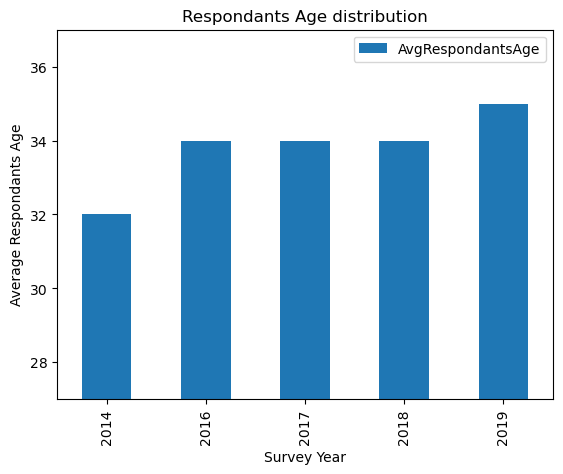

In [18]:
query = """
SELECT SurveyID,
AVG(CAST(AnswerText AS INTEGER)) AS AvgRespondantsAge
FROM Answer 
WHERE QuestionID = 1
GROUP BY SurveyID;
"""

AvgRespondantsAge = pd.read_sql(query, con).astype({"AvgRespondantsAge": int})

AvgRespondantsAge.plot.bar(x="SurveyID", y="AvgRespondantsAge")
plt.title("Respondants Age distribution")
plt.ylabel("Average Respondants Age")
plt.xlabel("Survey Year")
plt.ylim(27, 37)

In [19]:
query = """
SELECT SurveyID, UserID, AnswerText
FROM Answer 
WHERE QuestionID = 1
"""

RespondantsAge = pd.read_sql(query, con)
RespondantsAge["AnswerText"] = RespondantsAge["AnswerText"].astype("int64")
RespondantsAge.rename(columns={"AnswerText": "Respondants_Age"}, inplace=True)

bins = [0, 20, 30, 40, 50, 60, 70, 95]

labels = [
    "below 20",
    "between 21 and 30",
    "between 31 and 40",
    "between 41 and 50",
    "between 51 and 60",
    "between 61 and 70",
    "above 71",
]

RespondantsAge["Respondants_Age_Cluster"] = pd.cut(
    RespondantsAge["Respondants_Age"], bins=bins, labels=labels, right=False
)

In [20]:
merged_df_age = pd.merge(
    RespondantsAge, Mental_Health_disorder, on=["SurveyID", "UserID"], how="inner"
)

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'below 20'),
  Text(1, 0, 'between 21 and 30'),
  Text(2, 0, 'between 31 and 40'),
  Text(3, 0, 'between 41 and 50'),
  Text(4, 0, 'between 51 and 60'),
  Text(5, 0, 'between 61 and 70'),
  Text(6, 0, 'above 71')])

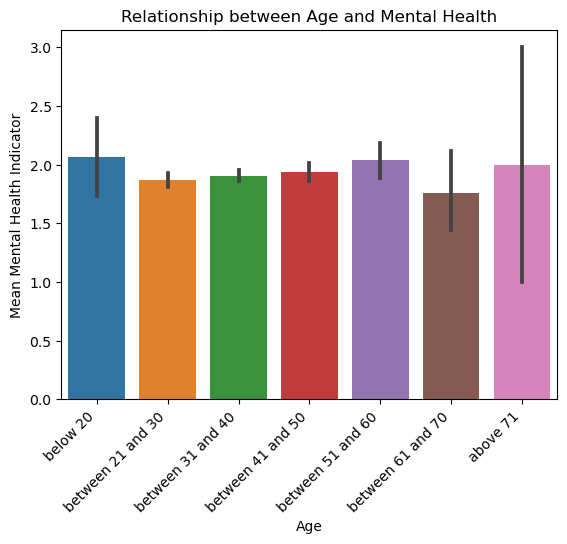

In [21]:
sns.barplot(data=merged_df_age, x="Respondants_Age_Cluster", y="Mental_Health_disorder")
plt.title("Relationship between Age and Mental Health")
plt.xlabel("Age")
plt.ylabel("Mean Mental Health Indicator")
plt.xticks(rotation=45, ha="right")

#### Result:

The prevalence of mental illness appears to be evenly distributed across age groups. Interestingly, the youngest and oldest age brackets exhibit the lowest scores, indicating poorer mental health. Conversely, the age group spanning from 61 to 70 years old demonstrates the most favorable mental health indicator. Age groups ranging from 21 to 50 years old display a slight decline in mental health, with the 50 to 60 years old group showing a more pronounced decrease.

### Respondants Gender

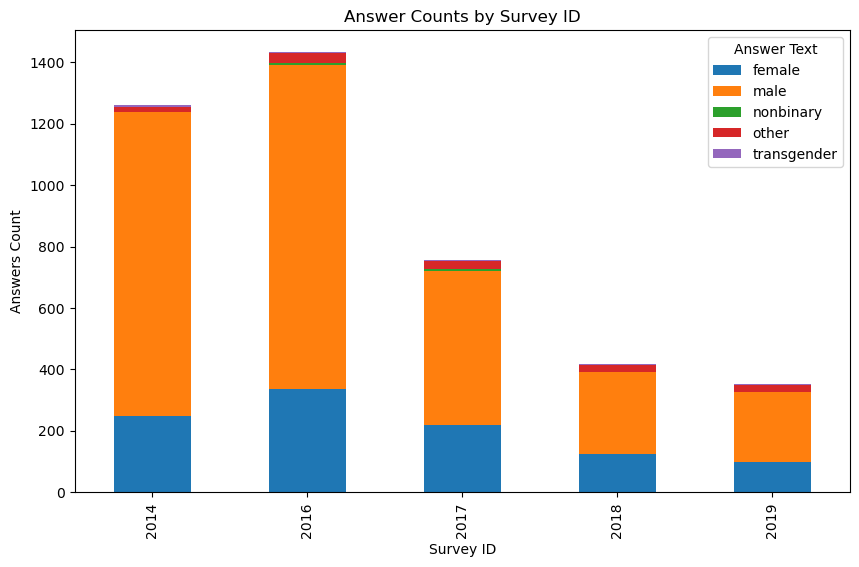

In [22]:
update_query_lower = """
    UPDATE Answer
    SET AnswerText = TRIM(LOWER(AnswerText));
"""
update_query_all = """
    UPDATE Answer
    SET AnswerText = 
         CASE 
            WHEN AnswerText LIKE 'male' THEN 'male'
            WHEN AnswerText LIKE '%trans%' THEN 'transgender'
            WHEN AnswerText IN ('nonbinary', 'non-binary') THEN 'nonbinary'
            WHEN AnswerText IN ('%woman-identified%', 'female') THEN 'female'
            ELSE 'other'
        END
     WHERE questionid = 2;
    
"""

con.execute(update_query_lower)
con.execute(update_query_all)
con.commit()

query = """
SELECT SurveyID, UserID, AnswerText, COUNT(AnswerText) AS Answers_Count
FROM Answer
WHERE questionid = 2 
GROUP BY SurveyID, AnswerText
"""

Gender_Answers_Count = pd.read_sql(query, con)

Gender_Answers_Count.rename(columns={"AnswerText": "Gender"}, inplace=True)

pivot_df = Gender_Answers_Count.pivot(
    index="SurveyID", columns="Gender", values="Answers_Count"
)

pivot_df.plot(kind="bar", stacked=True, figsize=(10, 6))
plt.title("Answer Counts by Survey ID")
plt.xlabel("Survey ID")
plt.ylabel("Answers Count")
plt.xticks(rotation=90)
plt.legend(title="Answer Text")

In [23]:
merged_df_gender = pd.merge(
    Gender_Answers_Count, Mental_Health_disorder, on=["SurveyID", "UserID"], how="inner"
)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'female'),
  Text(1, 0, 'male'),
  Text(2, 0, 'nonbinary'),
  Text(3, 0, 'other'),
  Text(4, 0, 'transgender')])

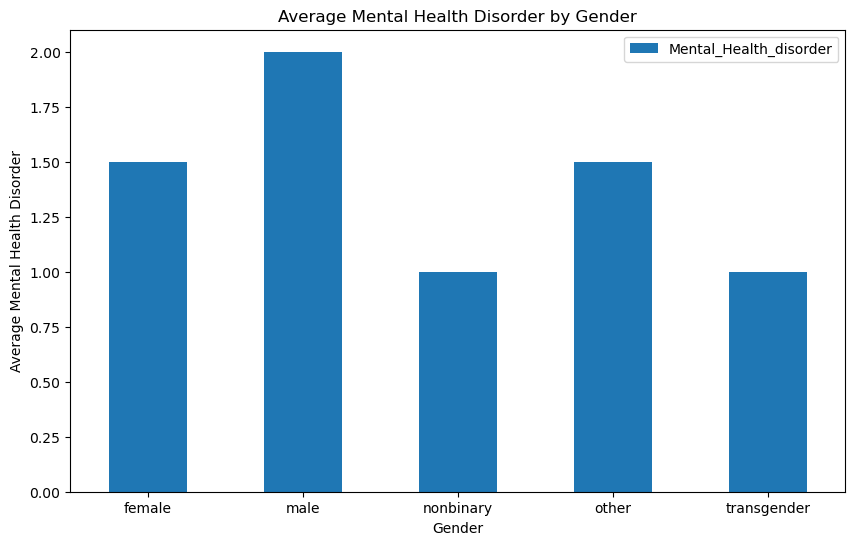

In [24]:
gender_grouped = merged_df_gender.groupby("Gender").agg(
    {"Mental_Health_disorder": "mean"}
)

gender_grouped.plot(kind="bar", figsize=(10, 6))
plt.title("Average Mental Health Disorder by Gender")
plt.xlabel("Gender")
plt.ylabel("Average Mental Health Disorder")
plt.xticks(rotation=0)

### Result:

The lowest levels of mental well-being are observed within the nonbinary and transgender communities, with females following closely behind, averaging at around 2.5. Other demographic groups combined exhibit intermediate levels of mental health, while males report the lowest scores (around 2.0).

## Exploring Mental Health: Selected Questions

I have selected several questions that demonstrate the respondent's connection to mental health disorders. These questions will be discussed in the subsequent section.

In [25]:
question = """
SELECT questiontext
FROM Question
WHERE questionid = 6;
"""
query = """
SELECT DISTINCT AnswerText
FROM Answer
WHERE questionid = 6;
"""
question_df = pd.read_sql(question, con)
question_text = question_df.iloc[0, 0]

print("Question: "), "/n", print(question_text)
pd.read_sql(query, con)

Question: 
Do you have a family history of mental illness?


,AnswerText
0,no
1,yes
2,i don't know


In [26]:
question = """
SELECT questiontext
FROM Question
WHERE questionid = 32;
"""
query = """
SELECT DISTINCT AnswerText
FROM Answer
WHERE questionid = 32;"""

question_df = pd.read_sql(question, con)
question_text = question_df.iloc[0, 0]

print("Question: "), "/n", print(question_text)
pd.read_sql(query, con)

Question: 
Have you had a mental health disorder in the past?


,AnswerText
0,yes
1,maybe
2,no
3,possibly
4,-1
5,don't know


In [27]:
update_query = """
UPDATE Answer
SET AnswerText = 
    CASE
        WHEN AnswerText IN ('possibly', 'don''t know', 'i don''t know') THEN 'maybe'
        ELSE AnswerText
    END
WHERE questionid IN (6, 32);
"""

con.execute(update_query)
con.commit()

In [28]:
question = """
SELECT questiontext
FROM Question
WHERE questionid = 21;
"""
query = """
SELECT DISTINCT AnswerText
FROM Answer
WHERE questionid = 21;"""

question_df = pd.read_sql(question, con)
question_text = question_df.iloc[0, 0]

print("Question: "), "/n", print(question_text)
pd.read_sql(query, con)

Question: 
Do you know local or online resources to seek help for a mental health issue?


,AnswerText
0,-1
1,"yes, i know several"
2,i know some
3,"no, i don't know any"


In [29]:
update_query = """
UPDATE Answer
SET AnswerText = 
    CASE
        WHEN AnswerText IN ('yes, i know several', 'i know some') THEN 'yes'
        WHEN AnswerText = 'no, i don''t know any' THEN 'no'
        ELSE AnswerText
    END
WHERE questionid = 21;
"""

con.execute(update_query)
con.commit()

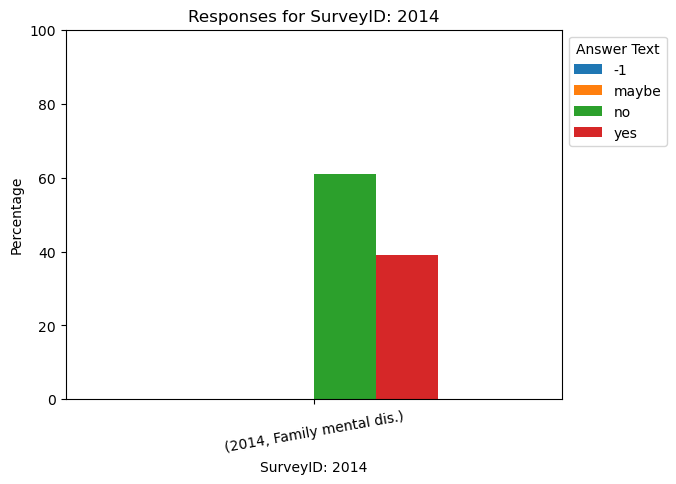

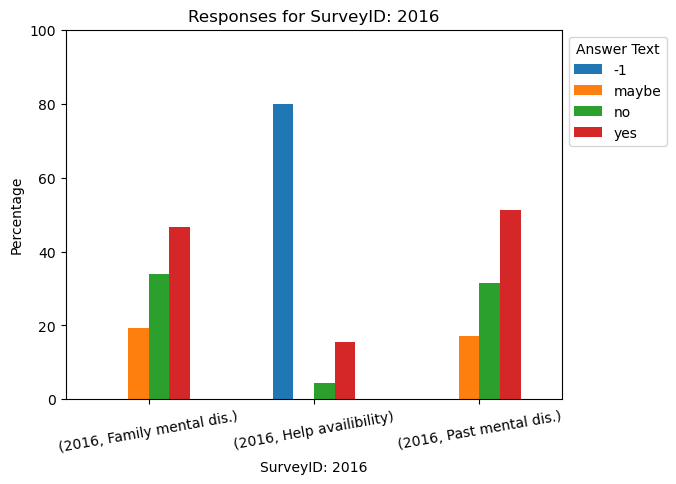

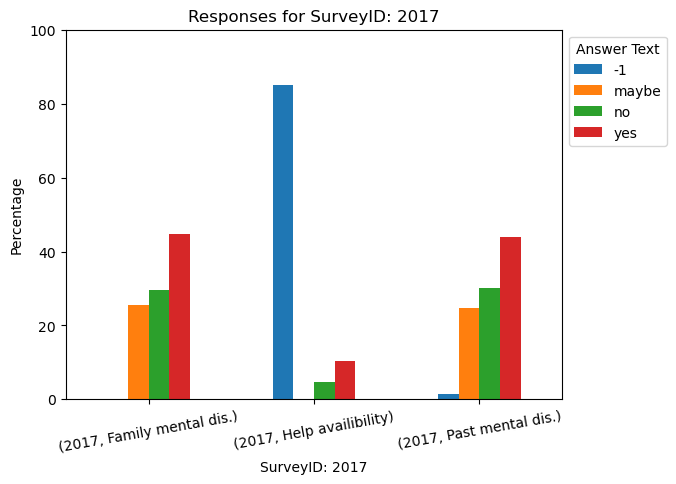

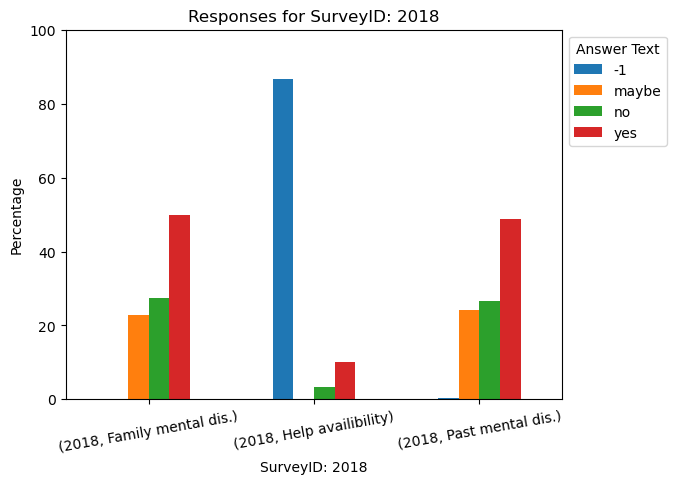

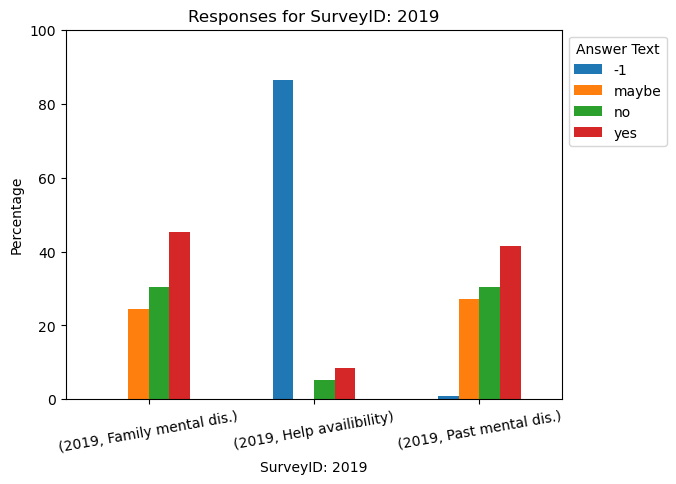

In [30]:
query = """
SELECT *,
CASE
    WHEN QuestionID = 6 THEN 'Family mental dis.'
    WHEN QuestionID = 32 THEN 'Past mental dis.'
    WHEN QuestionID = 21 THEN 'Help availibility'
END AS questiontext_short
FROM Answer
WHERE questionid = 6 OR questionid = 32 OR questionid = 21;
"""

df = pd.DataFrame(pd.read_sql(query, con))

grouped_data = (
    df.groupby(["SurveyID", "questiontext_short", "AnswerText"])
    .size()
    .unstack(fill_value=0)
)

grouped_data_percentage = grouped_data.div(grouped_data.sum(axis=1), axis=0) * 100

for survey_id, survey_data in grouped_data_percentage.groupby(level=0):
    survey_data.plot(kind="bar", stacked=False)
    plt.xlabel(f"SurveyID: {survey_id}")
    plt.ylabel("Percentage")
    plt.title(f"Responses for SurveyID: {survey_id}")
    plt.legend(title="Answer Text", loc='upper left', bbox_to_anchor=(1, 1))
    plt.xticks(rotation=10)
    plt.ylim(0, 100)


#### Results:

In the 2014 survey, only one question regarding family history of mental illness was included. The majority of respondents (60%) answered negatively, while 40% answered affirmatively.

From 2016 to 2019, comprehensive data on various aspects of mental health was collected. The results exhibited strikingly similar trends across these years, with negligible variations. Notably, inquiries about family mental illness yielded consistent patterns: approximately 50% of respondents indicated affirmative, around 35% answered negatively, and the remainder opted for "maybe." A parallel trend was observed in questions regarding past mental illness, showing a remarkably steady trajectory.

Concerning the availability of help, approximately 80% of respondents refrained from providing a response, denoted by a value of -1. Nevertheless, among those who did respond, a significant proportion acknowledged awareness of where to seek help. However, this trend exhibited a tendency to decrease over time.

## Mental Health at Work: Selected Questions

In this section, I have chosen and defined questions pertaining to mental health in the workplace, the readiness to discuss mental health issues, and the support received from employers.

In [31]:
question = """
SELECT questiontext
FROM Question
WHERE questionid = 99;
"""
query = """
SELECT DISTINCT AnswerText
FROM Answer
WHERE questionid = 99;
"""
question_df = pd.read_sql(question, con)
question_text = question_df.iloc[0, 0]

print("Question: "), "/n", print(question_text)
pd.read_sql(query, con)

Question: 
Would you be willing to discuss a mental health issue with your coworkers?


,AnswerText
0,some of them
1,no
2,yes


In [32]:
question = """
SELECT questiontext
FROM Question
WHERE questionid = 100;
"""
query = """
SELECT DISTINCT AnswerText
FROM Answer
WHERE questionid = 100;
"""
question_df = pd.read_sql(question, con)
question_text = question_df.iloc[0, 0]

print("Question: "), "/n", print(question_text)
pd.read_sql(query, con)

Question: 
Would you be willing to discuss a mental health issue with your direct supervisor(s)?


,AnswerText
0,yes
1,no
2,some of them


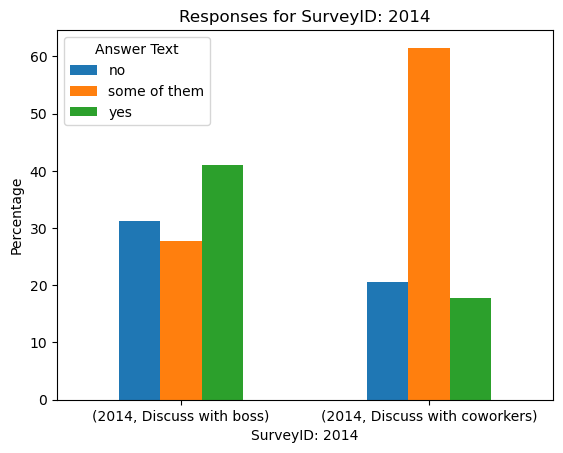

In [33]:
query = """
SELECT *,
CASE
    WHEN QuestionID = 99 THEN 'Discuss with coworkers'
    WHEN QuestionID = 100 THEN 'Discuss with boss'
END AS questiontext_short
FROM Answer
WHERE questionid = 99 OR questionid = 100;
"""

df = pd.DataFrame(pd.read_sql(query, con))

grouped_data = (
    df.groupby(["SurveyID", "questiontext_short", "AnswerText"])
    .size()
    .unstack(fill_value=0)
)

grouped_data_percentage = grouped_data.div(grouped_data.sum(axis=1), axis=0) * 100

for survey_id, survey_data in grouped_data_percentage.groupby(level=0):
    survey_data.plot(kind="bar", stacked=False)
    plt.xlabel(f"SurveyID: {survey_id}")
    plt.ylabel("Percentage")
    plt.title(f"Responses for SurveyID: {survey_id}")
    plt.legend(title="Answer Text")
    plt.xticks(rotation=0)

#### Results:

The graph depicts the readiness of individuals to engage in conversations about mental health with both their boss and coworkers. Interestingly, there is a higher frequency of negative responses regarding discussions with bosses compared to coworkers. However, the graph also reveals a greater number of positive responses in the coworker category. Notably, over 60% of employees appear uncertain about sharing their concerns with coworkers, indicating a significant level of indecision.

## Correlation

Organizing inquiries related to mental health, assigning numerical representations, and transforming them into dataframes suitable for correlation analysis.

In [34]:
question = """
SELECT questiontext
FROM Question
WHERE questionid = 10;
"""

query = """
SELECT DISTINCT(AnswerText)
FROM Answer
WHERE questionid = 10;"""


question_df = pd.read_sql(question, con)
question_text = question_df.iloc[0, 0]

print("Question: "), "/n", print(question_text)
pd.read_sql(query, con)

Question: 
Does your employer provide mental health benefits as part of healthcare coverage?


,AnswerText
0,yes
1,don't know
2,no
3,not eligible for coverage / na
4,-1
5,i don't know


In [35]:
update_query = """
UPDATE Answer
SET AnswerText = 
    CASE
        WHEN AnswerText IN ('not eligible for coverage / na', 'no') THEN 1
        WHEN AnswerText IN ('don''t know', 'i don''t know') THEN 2
        WHEN AnswerText = 'yes' THEN 3
        ELSE AnswerText
    END
WHERE questionid = 10;
"""

delete_query = """
DELETE FROM Answer 
WHERE AnswerText = -1 
AND questionid = 10;
"""

con.execute(update_query)
con.execute(delete_query)
con.commit()

query = """
SELECT AnswerText, SurveyID, UserID
FROM Answer
WHERE questionid = 10;"""

df1 = pd.read_sql(query, con)
df1["AnswerText"] = df1["AnswerText"].astype("int64")
df1.rename(columns={"AnswerText": "Mental_health_benefits"}, inplace=True)

In [36]:
question = """
SELECT questiontext
FROM Question
WHERE questionid = 94;
"""

query = """
SELECT DISTINCT(AnswerText)
FROM Answer
WHERE questionid = 94;"""

question_df = pd.read_sql(question, con)
question_text = question_df.iloc[0, 0]

print("Question: "), "/n", print(question_text)
pd.read_sql(query, con)

Question: 
Do you know the options for mental health care your employer provides?


,AnswerText
0,not sure
1,no
2,yes


In [37]:
update_query = """
UPDATE Answer
SET AnswerText = 
    CASE
        WHEN AnswerText = 'no' THEN 1
        WHEN AnswerText = 'not sure' THEN 2
        WHEN AnswerText = 'yes' THEN 3
        ELSE AnswerText
    END
WHERE questionid = 94;
"""

con.execute(update_query)
con.commit()


query = """
SELECT AnswerText, SurveyID, UserID
FROM Answer
WHERE questionid = 94;"""

df2 = pd.read_sql(query, con)
df2["AnswerText"] = df2["AnswerText"].astype("int64")
df2.rename(
    columns={"AnswerText": "Mental_health_care_options"},
    inplace=True,
)

In [38]:
question = """
SELECT questiontext
FROM Question
WHERE questionid = 65;
"""

query = """
SELECT DISTINCT(AnswerText)
FROM Answer
WHERE questionid = 65;"""

pd.read_sql(query, con)

print("Question: "), "/n", print(question_text)
pd.read_sql(query, con)

Question: 
Do you know the options for mental health care your employer provides?


,AnswerText
0,0
1,2
2,1
3,5
4,-1
5,10
6,8
7,7
8,3
9,9


In [39]:
delete_query = """
DELETE FROM Answer 
WHERE AnswerText = -1 
AND questionid = 65;
"""

con.execute(delete_query)
con.commit()

query = """
SELECT AnswerText, SurveyID, UserID
FROM Answer
WHERE questionid = 65;"""

question_df = pd.read_sql(question, con)
question_text = question_df.iloc[0, 0]
df3 = pd.read_sql(query, con)
df3["AnswerText"] = df3["AnswerText"].astype("int64")
df3.rename(columns={"AnswerText": "Mental_health_importance"}, inplace=True)

## Correlation analysis

### Mental health benefits provided by employer vs having mental health disorder

Text(0.5, 1.0, 'Correlation Matrix')

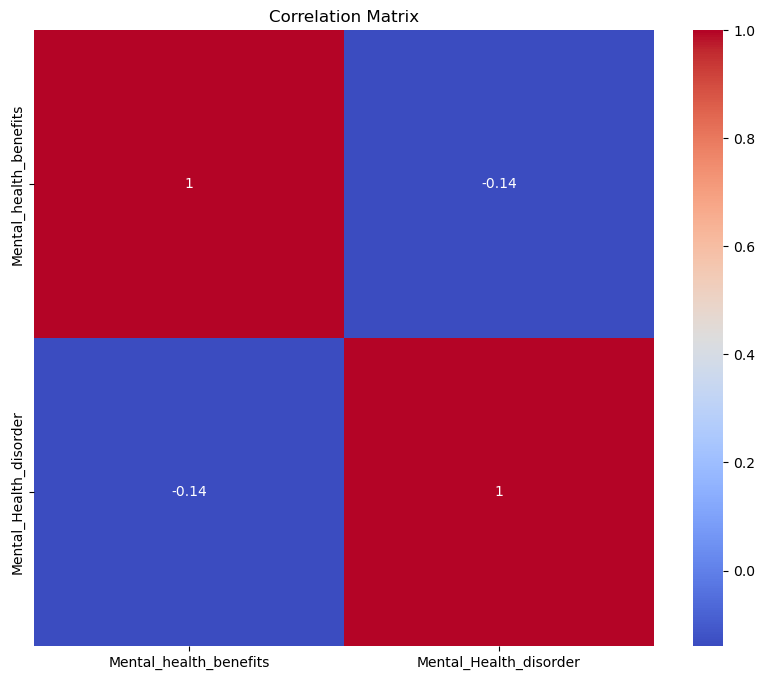

In [40]:
merged_df = pd.merge(
    df1, Mental_Health_disorder, on=["SurveyID", "UserID"], how="inner"
)

correlation_df = merged_df[["Mental_health_benefits", "Mental_Health_disorder"]]

correlation_matrix = correlation_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")

#### Result:

Contrary to my expectations and the results of the correlation analysis for mental health benefits provided by employers, greater provision of mental health benefits by employers is associated with a slight increase in the prevalence of mental disorders among individuals. This seems to contradict the notion that providing mental health benefits signifies greater importance placed on mental health by employers. However, the correlation between these factors is relatively low, with a coefficient of 0.14.

### Options for mental health care vs having mental health disorder

In [41]:
merged_df2 = pd.merge(
    df2, Mental_Health_disorder, on=["SurveyID", "UserID"], how="inner"
)
merged_df2

,Mental_health_care_options,SurveyID,UserID,Mental_Health_disorder


#### Result:

The questions did not receive responses from overlapping surveys or users, thus there are insufficient results available for merging and analysis.

### Mental health importance by employer vs having mental health disorder

Text(0.5, 1.0, 'Correlation Matrix')

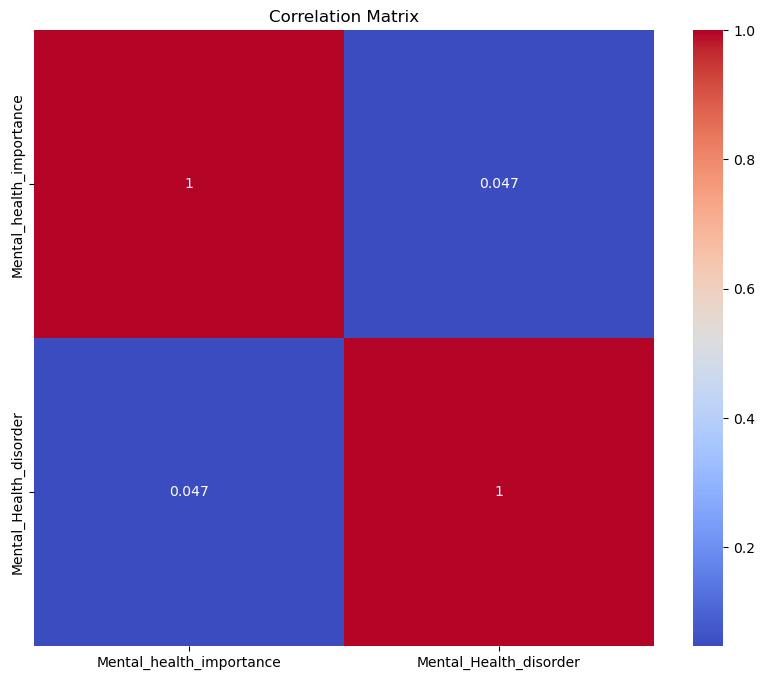

In [42]:
merged_df3 = pd.merge(
    df3, Mental_Health_disorder, on=["SurveyID", "UserID"], how="inner"
)

correlation_df = merged_df3[["Mental_health_importance", "Mental_Health_disorder"]]

correlation_matrix = correlation_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")

#### Result:

A higher importance placed on mental health by employers is associated with a very slight decrease in the prevalence of mental disorders among individuals. However, it's important to note that the correlation between these factors is very weak, with a coefficient of -0.047

# Conclusions

This analysis overviewed mental health trends and factors within the tech industry, providing insights into respondent demographics, their attitudes towards mental health, workplace dynamics, and correlations with employer-provided benefits, thereby contributing to a comprehensive understanding of mental health challenges in this sector.

1. **Survey Participation**: The analysis encompassed survey data from 2014 to 2019, with the highest participation observed in 2016, followed by a decline in subsequent years.

2. **Demographic Trends**: While age did not exhibit a clear correlation with mental health indicators, gender demonstrated significant differences, with nonbinary and transgender individuals reporting higher mental health scores compared to males.

3. **Mental Health in the Workplace**: Employees were more willing to engage in conversations about mental health with coworkers than with direct supervisors.

4. **Mental Health Benefits and Awareness**: The provision of mental health benefits by employers exhibited a weak positive correlation with the prevalence of mental health disorders among employees. However, the level of awareness regarding available mental health care options did not demonstrate a clear correlation with mental health indicators.

# Improvements/recommendations:

- **Data Completeness** Addressing missing or incomplete data is crucial for a more comprehensive analysis. Implementing strategies such as data imputation or exploring reasons for missing responses could enhance the reliability of the findings.

- **Qualitative Analysis** Integrating qualitative data, such as open-ended survey responses or interviews, could offer richer contextual understanding and complement the quantitative findings. Qualitative analysis can provide insights into the underlying factors driving certain trends or behaviors observed in the data.

- **Comparative Analysis**: Comparing mental health trends in the tech industry with other sectors or industries could highlight unique challenges or practices specific to the tech sector.